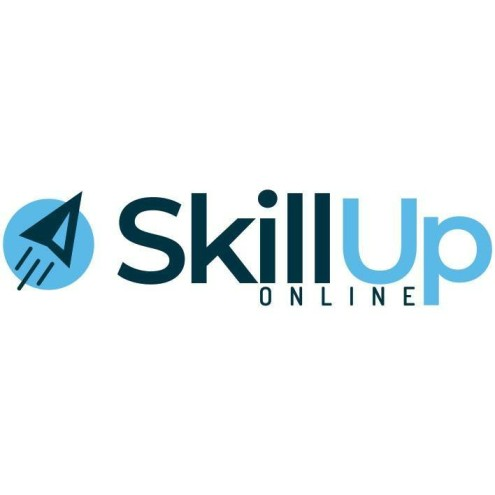

# **Detección de fraudes con tarjetas de crédito**

Enlace al dataset: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

### Importa las bibliotecas necesarias

In [1]:
# Importa la bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Importa y organiza el dataset

In [ ]:
# Organizar los datos en un dataframe
dataframe = pd.read_csv('creditcard.csv')
dataframe.head(10)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [9]:
dataframe.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [10]:
dataframe.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000



<details><summary><b>Haz clic aquí para obtener una pista</b></summary>



```
Comienza por importar la biblioteca de pandas: import pandas as pd.
    
Utiliza la función read_csv() para cargar el archivo CSV en un dataframe de pandas. Especifica la ruta en los paréntesis, por ejemplo: pd.read_csv("ruta_al_archivo.csv").
    
Asigna al dataframe resultante al nombre de una variable, por ejemplo: data = pd.read_csv("ruta_al_archivo.csv").
    
Utiliza el método head() sobre el dataframe para mostrar las primeras 10 filas, por ejemplo: data.head(10).
    
Asegúrate de reemplazar "ruta_al_archivo.csv" con la ruta real a tu archivo y el nombre de tu archivo CSV..

```



</details>

### Limpia los datos

a. Valores perdidos

In [ ]:
dataframe.isnull().sum()

# No hay valores nulos.

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

<details><summary><b>Haz clic aquí para obtener una pista</b></summary>



```

Utiliza el nombre de la variable del dataframe seguido del método isnull() para crear un dataframe booleano donde «verdadero» indique un valor nulo y «falso» indique un valor no nulo.

Utiliza el método sum() en el dataframe booleano para contar la cantidad de valores verdaderos (i.e., la cantidad de valores nulos) en cada columna.

Si unes ambos pasos, el código se verá así: data.isnull().sum()


Este código asume que el nombre del datafrme de pandas es «data». Si tu dataframe tiene un nombre diferente, reemplaza «data» con el nombre correcto de la variable.

```



</details>

b. Datos duplicados

In [20]:
dataframe.duplicated().sum()

# salida indica que hay 1081 filas duplicadas en el dataset

df_clean = dataframe.drop_duplicates() # elimina las filas duplicadas

df_clean.duplicated().sum() # salida indica que hay 0 filas duplicadas en el dataset

df_clean.head(10)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


<details><summary><b>Haz clic aquí para obtener una pista</b></summary>



```
Usa el nombre de la variable del dataframe seguido del método duplicated() para crear un dataframe booleano donde «verdadero» indicará una fila duplicada y «falso» una fila no duplicada.

Usa el método sum() en el dataframe booleano para contar la cantidad de valores verdaderos (i.e., la cantidad de filas duplicadas).

Si unes ambos pasos, el código se verá así: data.duplicated().sum()

Este código asume que el nombre del dataframe de pandas es «data». Si tu dataframe tiene un nombre diferente, reemplaza «data» con el nombre correcto de la variable.

```



</details>

### Analiza los datos

Pregunta 1: ¿Cuál es el porcentaje de transacciones fraudulentas en el dataset?



In [22]:
# Calcula el porcentaje de transacciones fraudulentas
fraudulent_transactions = df_clean[df_clean['Class'] == 1].shape[0]
'''
-> df_clean['Class'] == 1 crea una condición que selecciona solo las filas donde la columna Class tiene el valor 1, es decir, las transacciones que son fraudulentas.
-> df_clean[df_clean['Class'] == 1] filtra el dataframe para quedarse solo con estas filas fraudulentas.
-> .shape[0] devuelve el número de filas en este subconjunto filtrado, lo cual es el total de transacciones fraudulentas, y se guarda en la variable fraudulent_transactions
'''

# Calcular el número total de transacciones
total_transactions = df_clean.shape[0]
'''
-> df_clean.shape[0] devuelve el número total de filas en df_clean, que representa el número total de transacciones en el dataset. Este valor se guarda en total_transactions.
'''

# Calcula y muestra el porcentaje de transacciones fraudulentas
fraud_percentage = (fraudulent_transactions / total_transactions) * 100

fraud_percentage

0.1667101358352777

<details>
  <summary><b>Haz clic aquí para obtener una pista</b></summary>

    Para calcular el porcentaje de transacciones fraudulentas, debes contar la cantidad de transacciones fraudulentas (aquellas donde «Class» es igual a 1) y dividirla por le número total de transacciones en el dataset. Después, multiplica el resultado por 100 para obtener el porcentaje.
</details>

Pregunta 2: ¿Cuál es el importe medio de las transacciones fraudulentas?



In [25]:
# Calcula el importe medio de las transacciones fraudulentas
fraudulent_mean_amount = df_clean[df_clean['Class'] == 1]['Amount'].mean()
'''
-> df_clean[df_clean['Class'] == 1] filtra el dataframe para incluir solo las transacciones donde Class es igual a 1, es decir, solo las transacciones fraudulentas.
-> ['Amount'] selecciona la columna Amount de las transacciones fraudulentas.
-> .mean() calcula la media de los valores en esta columna, obteniendo el importe medio de las transacciones fraudulentas.
'''


# Muestra el importe medio de las transacciones fraudulentas
print(fraudulent_mean_amount)

123.87186046511628


<details>
  <summary><b>Haz clic aquí para obtener una pista</b></summary>

    Para calcular el importe medio de las tansacciones fraudulentas, primero deberás filtrar el dataset para que contenga solamente las transacciones fraudulentas (aquellas donde «Class» es igual a 1) y, después, calcular la media de la columna «Amount» de los datos filtrados.
</details>

### Visualiza los datos


Pregunta 1: ¿Cuántas transacciones fraudulentas hay en comparación con las no fraudulentas? (Utiliza un gráfico de barras)

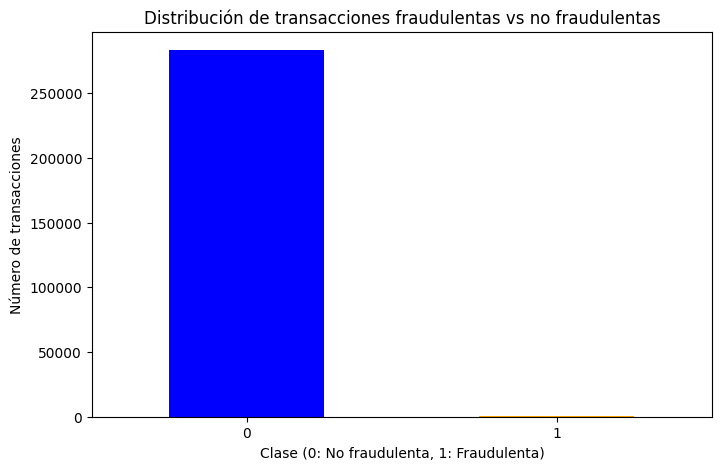

In [28]:
# Cuenta el número de transacciones fraudulentas y no fraudulentes
class_counts = df_clean['Class'].value_counts()
'''
-> df_clean['Class'].value_counts() cuenta el número de transacciones de cada clase (0 para no fraudulenta y 1 para fraudulenta) y guarda los resultados en class_counts
'''

# Muestra la distribución de las traducciones fraudulentas con respecto de las no fraudulentas
plt.figure(figsize=(8, 5))
class_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribución de transacciones fraudulentas vs no fraudulentas')
plt.xlabel('Clase (0: No fraudulenta, 1: Fraudulenta)')
plt.ylabel('Número de transacciones')
plt.xticks(rotation=0)
plt.show()

### Extra
- En el gráfico existe una diferencia tan grande entre las fraudolentas y no fraudolentas que las `fraudolentas` casi ni se aprecian.
- Cuando tienes una diferencia tan grande entre las dos categorías, puedes mejorar la claridad del gráfico utilizando una escala logarítmica en el eje y. Esto permitirá que las transacciones fraudulentas (que son mucho menos frecuentes) sean más visibles en relación con las no fraudulentas.

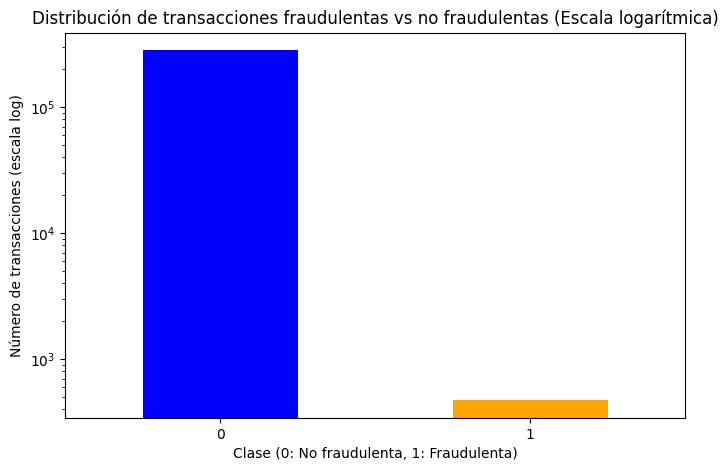

In [29]:

# Muestra la distribución de las transacciones fraudulentas con respecto a las no fraudulentas
plt.figure(figsize=(8, 5))
class_counts.plot(kind='bar', color=['blue', 'orange'])
plt.yscale('log')  # Aplica una escala logarítmica al eje y
plt.title('Distribución de transacciones fraudulentas vs no fraudulentas (Escala logarítmica)')
plt.xlabel('Clase (0: No fraudulenta, 1: Fraudulenta)')
plt.ylabel('Número de transacciones (escala log)')
plt.xticks(rotation=0)
plt.show()

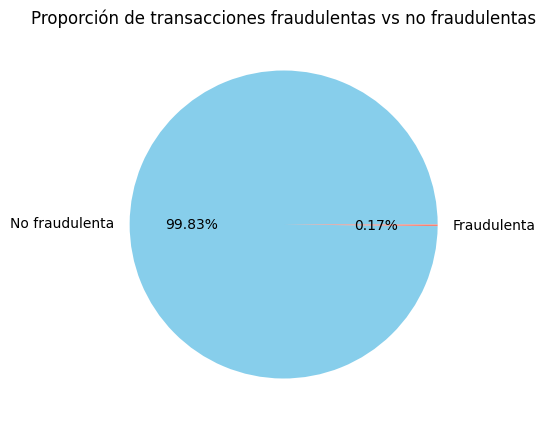

In [30]:
# Gráfico de pastel para visualizar la proporción de transacciones fraudulentas y no fraudulentas
plt.figure(figsize=(8, 5))
class_counts.plot(kind='pie', labels=['No fraudulenta', 'Fraudulenta'], autopct='%1.2f%%', colors=['skyblue', 'salmon'])
plt.title('Proporción de transacciones fraudulentas vs no fraudulentas')
plt.ylabel('')  # Ocultar la etiqueta del eje y
plt.show()

<details>
  <summary><b>Haz clic aquí para obtener una pista</b></summary>

    Para crear un gráfico de barras que muestre la cantidad de transacciones fraudulentas y no fraudulentas, deberás contar las veces que ocurre cada clase (fraude y no fraude) según la información de la columna «Class» y después representar estos recuentos en un gráfico de barras.
</details>

Pregunta 2: ¿Cuál es la distribución de los importes de las transacciones fraudulentas? (Utiliza un histograma)


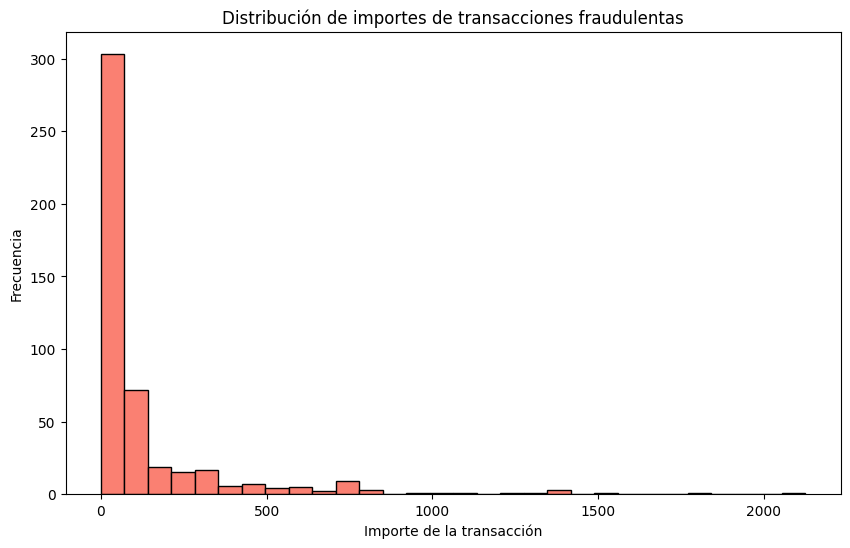

In [33]:
# Separa los datos de transacciones fraudulentas
fraudulent_data = df_clean[df_clean['Class'] == 1]
'''
-> fraudulent_data = df_clean[df_clean['Class'] == 1] filtra el dataframe para obtener solo las transacciones fraudulentas.
'''

# Muestra la distribución de los importes de las transacciones fraudulentas
plt.figure(figsize=(10, 6))
plt.hist(fraudulent_data['Amount'], bins=30, color='salmon', edgecolor='black')
plt.title('Distribución de importes de transacciones fraudulentas')
plt.xlabel('Importe de la transacción')
plt.ylabel('Frecuencia')
plt.show()

<details>
  <summary><b>Haz clic aquí para obtener una pista</b></summary>
    
    Para visualizar la distribución de los importes de las transacciones fraudulentas, deberás filtrar el dataset para que contenga únicamente las transacciones fraudulentas (aquellas donde «Class» es igual a 1) y, después, usar un histograma para representar la distribución de los valores de la columna «Amount» de los datos filtrados.
</details>

## Desarrollo y evaluación de modelos

### Separa del dataset

In [34]:
from sklearn.model_selection import train_test_split

In [36]:
# Separa los datos de entrenamiento y evaluación

# Crear el dataframe X con todas las columnas excepto 'Class'
X = df_clean.drop(columns=['Class'])

# Crear la serie y con solo la columna 'Class'
y = df_clean['Class']

# Separar los datos en grupos de entrenamiento y evaluación (80% entrenamiento, 20% evaluación)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verifica las dimensiones de los conjuntos resultantes
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((226980, 30), (56746, 30), (226980,), (56746,))

#### Nota acalatoria

Esta línea nos permite confirmar que la división se ha realizado correctamente en un 80% para entrenamiento y un 20% para evaluación, y que los conjuntos de X e y se alinean en cuanto al número de filas.

`X_train.shape, X_test.shape, y_train.shape, y_test.shape`:

- `X_train.shape:` Muestra las dimensiones del conjunto de entrenamiento de las características (X_train), que contiene el 80% de los datos originales de X.
- `X_test.shape:` Muestra las dimensiones del conjunto de evaluación de las características (X_test), que contiene el 20% de los datos originales de X.
- `y_train.shape:` Muestra las dimensiones de las etiquetas de clase del conjunto de entrenamiento (y_train), que contiene el 80% de los datos originales de y.
- `y_test.shape:` Muestra las dimensiones de las etiquetas de clase del conjunto de evaluación (y_test), que contiene el 20% de los datos originales de y.

`Salida: ((226980, 30), (56746, 30), (226980,), (56746,))`

- `X_train.shape: (226980, 30)`: 
    - El conjunto de entrenamiento de características (X_train) tiene 226,980 filas y 30 columnas (una fila por transacción y una columna por cada característica).
- `X_test.shape: (56746, 30)`: 
    - El conjunto de evaluación de características (X_test) tiene 56,746 filas y 30 columnas, con un 20% de los datos de X.
- `y_train.shape: (226980,)`: 
    - El conjunto de entrenamiento de etiquetas (y_train) tiene 226,980 elementos, uno por cada fila en X_train, y representa las clases de cada transacción.
- `y_test.shape: (56746,)`: 
    - El conjunto de evaluación de etiquetas (y_test) tiene 56,746 elementos, uno por cada fila en X_test.

<details><summary><b>Haz clic aquí para obtener una pista</b></summary>



```
Una vez que tegas este dataset, puedes utilizar la biblioteca scikit-learn para separar los datos en grupos de entrenamiento y de evaluación con la función train_test_split().

Primero, puedes crear un dataframe de pandas «X» con todas las columnas excepto la columna «Class». Puedes crear una serie de pandas «y» solamente con la clumna «Class» column.

A continuación, pueder usar la función train_test_split() para separar los datos en grupos de entrenamiento y de evaluación. Puedes pasar las variables X e Y como argumentos junto con el argumento test_size para especificar el porcentaje del dataset que se deberá asignar al grupo de evaluación (en este caso, el 20 %). También puedes utilizar el argumento random_state para determinar un valor fijo de tal manera que, cada vez que se ejecute el código, se produzca la misma división.

La función train_test_split() devuelve cuatro variables: X_train, X_test, y_train y y_test. X_train e y_train representan el grupo de entrenamiento, minetras que X_test e y_test representan el grupo de evaluación. Puedes utilizar estas variable para entrenar y evaluar tus modelos de aprendizaje automático.

Ten en cuenta que es importante dividir los datos en grupos de entrenamiento y de evaluación para evitar el sobreajuste y permitir que se evalúe el rendimiento del modelo con datos que desconoce.

```



</details>

### Crea y evalúa los modelos

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [38]:
# Crear una instancia del modelo RandomForestClassifier con los hiperparámetros especificados
model = RandomForestClassifier(max_depth=150, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Hacer predicciones sobre el conjunto de evaluación
y_pred = model.predict(X_test)

In [39]:
# Mostrar el reporte de clasificación con precisión, exhaustividad y puntuación F1
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.97      0.73      0.84        90

    accuracy                           1.00     56746
   macro avg       0.99      0.87      0.92     56746
weighted avg       1.00      1.00      1.00     56746



In [40]:
# Calcular y mostrar la exactitud del modelo en el conjunto de evaluación
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Exactitud del modelo: {accuracy:.2f}%")

Exactitud del modelo: 99.95%


<details><summary><b>Haz clic aquí para obtener una pista</b></summary>



```
Debes haber importado las bibliotecas y clases necesarias, tales como la clase RandomForestClassifier de scikit-learn y las funciones classification_report() y accuracy_score() functions del módulo sklearn.metrics.

Una vez hayas hecho esto, podrás crear una instancia de la clase RandomForestClassifier configurando los hiperparámetros max_depth y random_state en 150 y 42, respectivamente. Puedes utilizar el método .fit() para entrenar el modelo con los datos de entrenamiento.

A continuación, puedes utilizar el modelo entrenado para hacer predicciones sobre los datos de evaluación con el método .predict(). Puedes almacenar estas predicciones en una variable llamada y_pred.

Después, puedes utilizar la función classification_report() para mostrar en la pantalla un resumen del rendimiento del modelo con los datos de entrenamiento. Esto incluirá métricos tales como la precisión (precission), la exhaustividad (recall) y la puntuación F1 (f1-score) para cada una de las clases (en este caso, si una transacción es fraudulenta o normal). También puedes utilizar la función accuracy_score() para calcular la exactitud general del modelo con los datos de evaluación.

Finalmente, podrás mostrar la exactitud el modelo en forma de porcentaje; utiliza el operador *100 para multiplicar la puntuación de exactitud por 100.

```



</details>